In [209]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

import numpy as np
from scipy import optimize
from model import Model
from matplotlib import pyplot as plt
from Simulation import simulate
import EGM
import tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [210]:
model = Model()
model.setup()

model.par.Na = 100
model.par.Tmax = 45
model.par.Tsim = model.par.Tmax
model.par.a_max = 20
model.par.Smax = 6
model.par.Ntypes = 1
model.par.sigma_taste = 1.0

model.set_grids()

In [211]:
par = model.par
sol = model.sol
sim = model.sim

In [212]:
model.solve()

c:\Users\sofie\OneDrive\Dokumenter\Skole\DynamicProgramming\DP_term_paper\main_model\model.py:207: RuntimeWarning: invalid value encountered in double_scalars
  retire = (1/(1-par.rho))*a_next**(1-par.rho)
c:\Users\sofie\OneDrive\Dokumenter\Skole\DynamicProgramming\DP_term_paper\main_model\model.py:207: RuntimeWarning: divide by zero encountered in double_scalars
  retire = (1/(1-par.rho))*a_next**(1-par.rho)
c:\Users\sofie\OneDrive\Dokumenter\Skole\DynamicProgramming\DP_term_paper\main_model\model.py:204: RuntimeWarning: invalid value encountered in double_scalars
  uc = (1/(1-par.rho))*c**(1-par.rho)


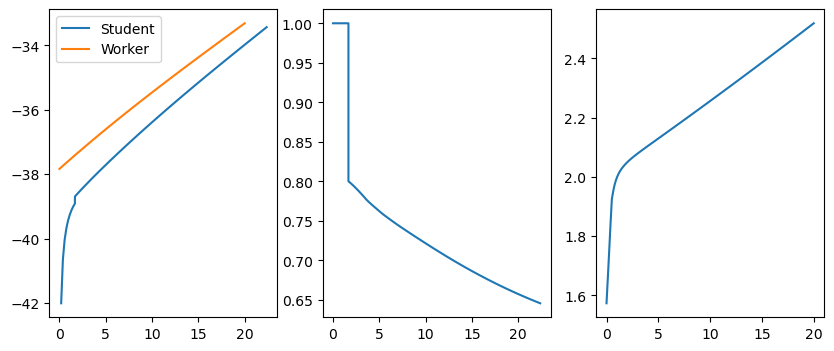

In [213]:
t = 0
s = 0
type = 0

fig,ax = plt.subplots(1,3,figsize=(10,4))

ax[0].plot(sol.m[type,t,0,s,1:,0],sol.V[type,t,0,s,1:,0],label = "Student")
ax[0].plot(sol.m[type,t,1,s,1:,0],sol.V[type,t,1,s,1:,0],label = "Worker")
ax[0].legend()

ax[1].plot(sol.m[type,t,0,s,:,0],sol.ccp_work[type,t,0,s,:,0],label = "Student")

ax[2].plot(sol.m[type,t,1,s,:,0],sol.c[type,t,1,s,:,0],label = "Student")

In [214]:
#t = 2
#s = 2

#fig,ax = plt.subplots(1,3,figsize=(10,4))

#ax[0].plot(sol.m[0,t,0,s,:,0],sol.V[0,t,0,s,:,0],label = "Clever and Rich Economist")
#ax[0].plot(sol.m[1,t,0,s,:,0],sol.V[1,t,0,s,:,0],label = "Stupid and Poor Economist")
#ax[0].legend()

#ax[1].plot(sol.m[0,t,0,s,:,0],sol.ccp_work[0,t,0,s,:,0],label = "Student")

#ax[2].plot(sol.m[0,t,0,s,:,0],sol.c[0,t,0,s,:,0],label = "Student")

Text(0.5, 1.0, 'Savings')

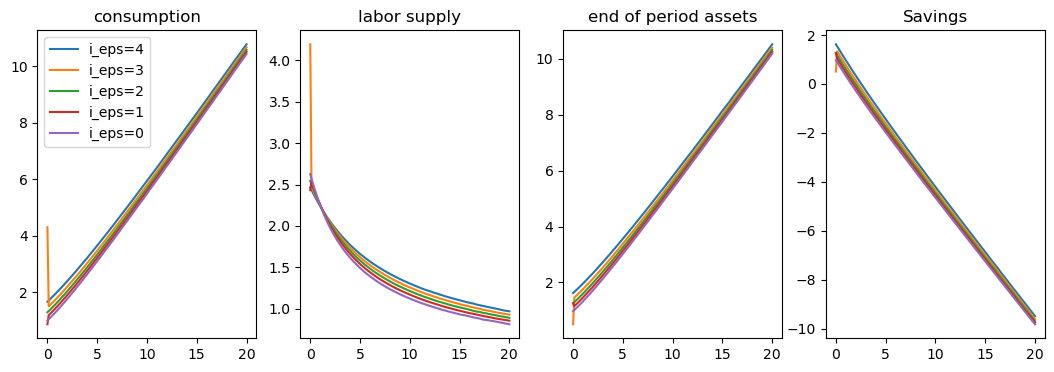

In [215]:
# plot some policy functions, just to be sure
t = -1
edu = 0
type = 0 

fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(1,4,1)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.c[type, t, 1, edu, par.Ba:, 4], label='i_eps=4')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.c[type, t, 1, edu, par.Ba:, 3], label='i_eps=3')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.c[type, t, 1, edu, par.Ba:, 2], label='i_eps=2')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.c[type, t, 1, edu, par.Ba:, 1], label='i_eps=1')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.c[type, t, 1, edu, par.Ba:, 0], label='i_eps=0')
ax.set_title('consumption')
ax.legend()

ax = fig.add_subplot(1,4,2)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.ell[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.ell[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.ell[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.ell[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.ell[type, t, 1, edu, par.Ba:, 0])
ax.set_title('labor supply')

ax = fig.add_subplot(1,4,3)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.a[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.a[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.a[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.a[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.a[type, t, 1, edu, par.Ba:, 0])
ax.set_title('end of period assets')

ax = fig.add_subplot(1,4,4)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.a[type, t, 1, edu, par.Ba:, 4]-sol.m[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.a[type, t, 1, edu, par.Ba:, 3]-sol.m[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.a[type, t, 1, edu, par.Ba:, 2]-sol.m[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.a[type, t, 1, edu, par.Ba:, 1]-sol.m[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.a[type, t, 1, edu, par.Ba:, 0]-sol.m[type, t, 1, edu, par.Ba:, 0])
ax.set_title('Savings')

In [216]:
simulate(sim,sol,par)

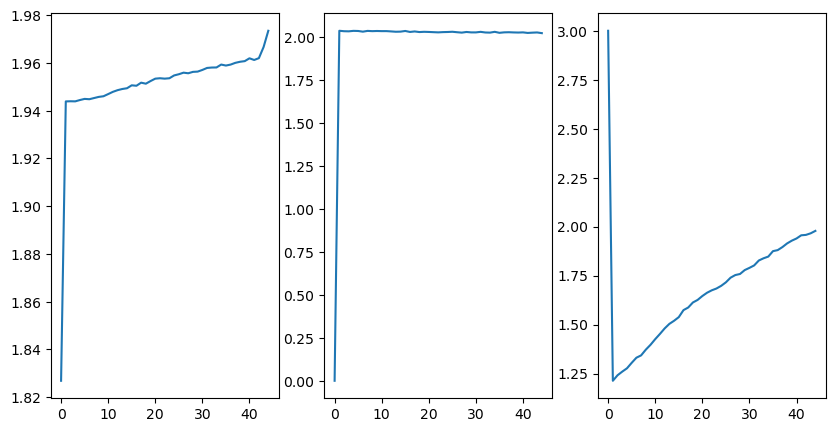

In [217]:
s = np.max(sim.S[0,:,:],axis=1)
I = s==1



fig,ax = plt.subplots(1,3,figsize=(10,5))
ax[0].plot(np.mean(sim.c[0,I,:],axis=0),label="c")
ax[1].plot(np.mean(sim.ell[0,I,:],axis=0),label="$\ell$")
ax[2].plot(np.mean(sim.a[0,I,:],axis=0),label="a")
#fig.legend()

In [222]:
# Euler errors
